## Model Evaluation and Interpretation

### Model Evaluation

* Machine learning models ought to be able to give accurate predictions
* After training a model, how do we know whether it actually works?
* Evaluating a model is a core part of building an effective machine learning model
* How much can we trust its predictions?
* How do we know the model will work well on new future data?

### Model Interpretation

* How do we understand what the model is really doing?
* How to understand the individual predictions?
* What features are important for the model?
* How to get feature importance for different types of models (not only Decision Trees)


<hr style="border:2px solid gray"> </hr>

### Model Evaluation Techniques

* Model evaluation aims to estimate the generalization accuracy of a model on future (unseen/out-of-sample) data.
* 2 categories: namely, [holdout](#Holdout) and [Cross-validation](#Cross-Validation)
* Different evaluation metrics are used for different kinds of problems
* The key is, both methods use a test set (i.e data not seen by the model) to evaluate model performance.
    - You shouldn't use your training data to evaluate it. You are cheating yourself. 
    - If you do so, you can make it look like 100% accuracy.
    - Training error vs. Testing error
    
* <font color='red'>Big assumption: the future data will have similar distribution as the test dataset.</font>
    - The weather forecast model you trained and tested in Canada won't work the same performance in Carribean.

    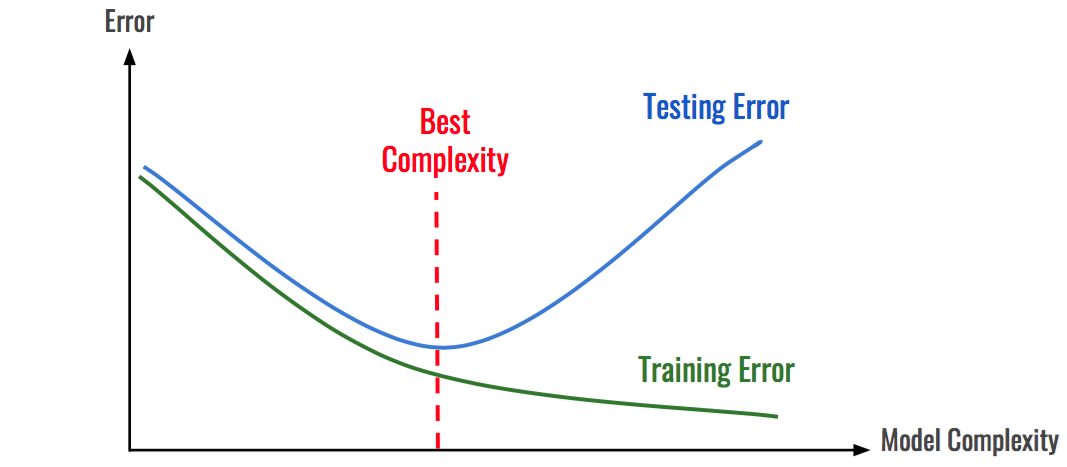
    



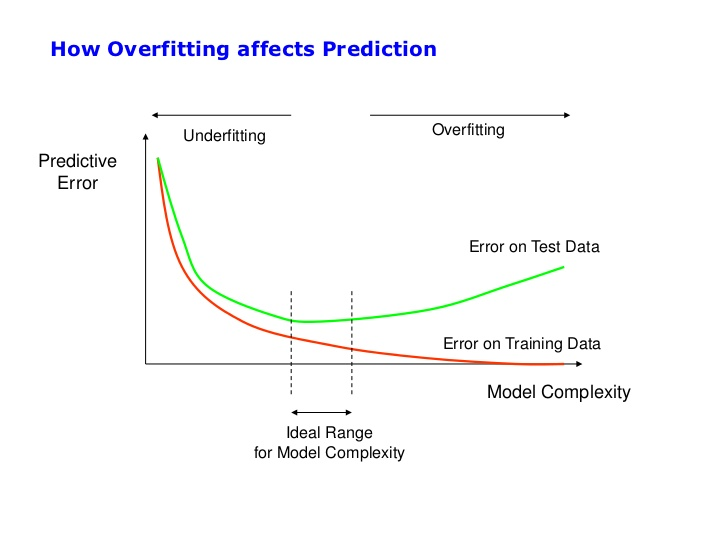



### [Holdout](#Model-Evaluation-Techniques)

* The purpose of holdout evaluation is to test a model on different data than it was trained on. 
* This provides an unbiased estimate of learning performance.

#### The dataset is randomly divided into three subsets:
    1. Train: a subset of the dataset used to build predictive models.
    2. Validation: a subset of the dataset used to assess the performance of the model built in the training phase.         
    3. Test: a subset of the dataset used to assess the likely future performance of a model. 
        

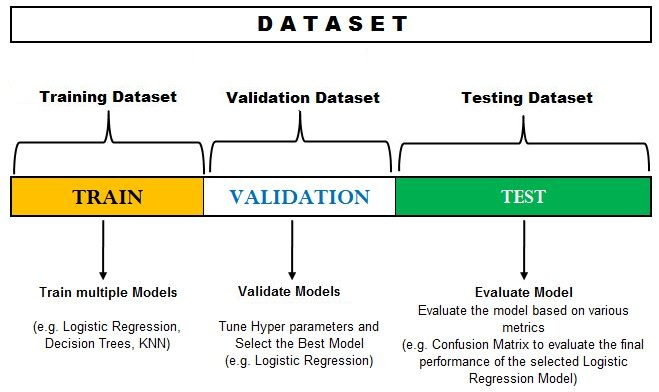



#### Notes:

* Validation set provides a test platform for fine-tuning a model’s parameters and selecting the best performing model. Not all modeling algorithms need a validation set.
* If a model fits to the training set much better than it fits the test set, overfitting is probably the cause.
* The percentages of each sets can be 60-10-30

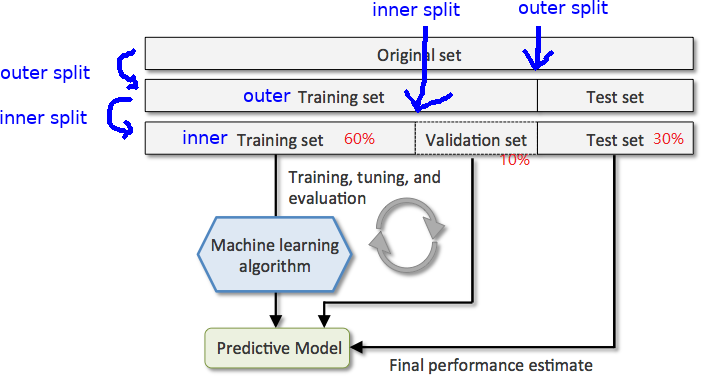

#### Pros and Cons:

* Speed, simplicity, and flexibility. 
* The differences in the training and test dataset can result in meaningful differences in the estimate of accuracy.


### [Cross-Validation](#Model-Evaluation-Techniques)

* To avoid the differences in the training and test dataset, the idea is very simple
    - each piece of data has the chance to be in training dataset and test dataset
    - average all testing errors
* k-fold cross-validation
* The original dataset is partitioned into k equal size subsamples, called folds. 
* The k is a user-specified number, usually with 5 or 10 as its preferred value. 
* This is repeated k times, such that each time, one of the k subsets is used as the test set set and the other k-1 subsets are put together to form a training set. 
* The error estimation is averaged over all k trials to get the total effectiveness of our model.

<img src="https://tinyurl.com/y5ysl2vg" width="750" align="center">

* In this example, every data point gets to be in a test set exactly once and gets to be in a training set k-1 times

#### Why do we do this?

* Use most of the data for fitting
    - reduce bias
* Most of the data is also being used in the test set
    - reduce variance

#### Use train, validation and test all together with cross validation

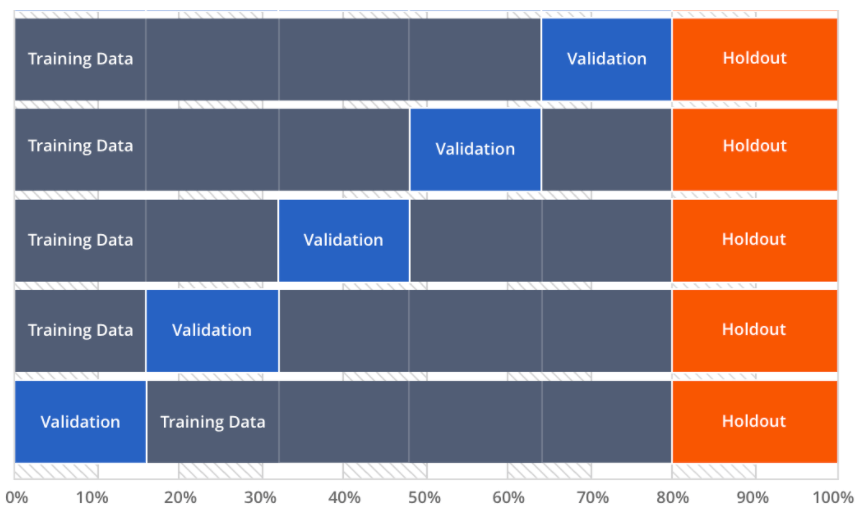

### Model Evaluation Metrics

* Classification Metrics
    - [Classification Accuracy](#Classification-Accuracy)
    - [Confusion matrix](#Confusion-Matrix)
    - [Logarithmic Loss](#Log-loss,-aka-logistic-loss-or-cross-entropy-loss.)
    - [Area under curve (AUC)](#Area-under-Curve-(AUC))
    - [F-Measure](#F-Measure)
    
    
* Regression Metrics
    - Mean Absolute Error (MAE)
    - Root Mean Squared Error (RMSE)

### [Classification Accuracy](#Model-Evaluation-Metrics)

* correct predictions / all predictions
* Accuracy is a valid choice of evaluation for classification problems which are well balanced and not skewed or No class imbalance.

In [1]:
import warnings
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.metrics import accuracy_score
#ignore warnings
warnings.filterwarnings('ignore')

#### Load digits dataset

In [2]:
iris = datasets.load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

#### Create feature matrix

In [3]:
X = iris.data
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

#### Create target vector

In [4]:
y = iris.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

#### cross validation settings

In [5]:
#generate the same set of random numbers
seed = 1
kfold = model_selection.KFold(n_splits=10, random_state=seed)
kfold

KFold(n_splits=10, random_state=1, shuffle=False)

#### Evaluate a logistic regression model using cross validation

In [6]:
model = LogisticRegression()
results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
print('Accuracy -val set: %.2f%% (%.2f)' % (results.mean()*100, results.std()))
results

Accuracy -val set: 88.00% (0.15)


array([1.        , 1.        , 1.        , 0.86666667, 0.73333333,
       0.66666667, 1.        , 0.93333333, 0.6       , 1.        ])

#### Evaluate a logistic regression model using holdout

In [7]:
test_size = 0.33 # try different test size and seed
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=test_size, random_state=seed)
model.fit(X_train, y_train)
result = model.score(X_test, y_test)
print("Accuracy - test set: %.2f%%" % (result*100.0))

Accuracy - test set: 88.00%


### [Confusion Matrix](#Model-Evaluation-Metrics)

* A more detailed breakdown of correct and incorrect classifications for each class
* Precision and recall are better metrics for imbalanced data.

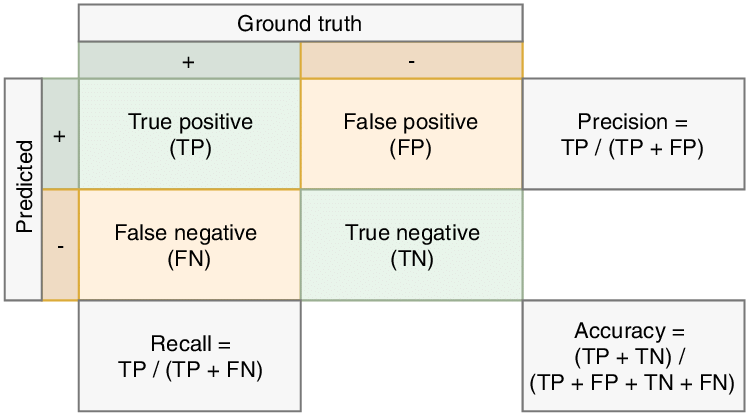

In [8]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline  

In [9]:
pred = model.predict(X_test)

In [10]:
y_test

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 0, 1, 2, 2, 0, 2, 2,
       1, 2, 0, 0, 0, 1])

In [11]:
pred

array([0, 1, 1, 0, 2, 2, 2, 0, 0, 2, 1, 0, 2, 1, 2, 0, 1, 2, 0, 0, 1, 2,
       2, 0, 2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 0, 1, 2, 2, 0, 2, 2,
       1, 2, 0, 0, 0, 2])

In [12]:
labels = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
cm = confusion_matrix(y_test, pred)
cm

array([[17,  0,  0],
       [ 0, 13,  6],
       [ 0,  0, 14]], dtype=int64)

In [13]:
(17+13+14)/(17+13+14+6)

0.88

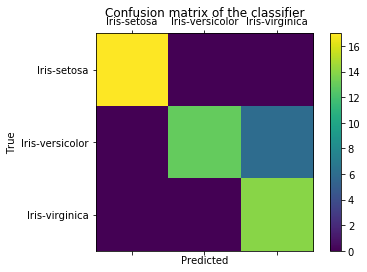

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

### [Log loss, aka logistic loss or cross-entropy loss.](#Model-Evaluation-Metrics)

* Log Loss is the most important classification metric based on probabilities.
* measures the performance of a classification model where the prediction is a probability value between 0 and 1. 
* Log loss increases as the predicted probability diverges from the actual label. 
* The goal of machine learning models is to minimize this value. 
* While it's hard to interpret raw log-loss values, but log-loss is still a good metric for comparing models. For any given problem, a lower log-loss value means better predictions.
* As such, smaller logloss is better, with a perfect model having a log loss of 0.

* For a single sample with true label y_test in {0,1} and estimated probability probs_y that y_test = 1, the log loss is

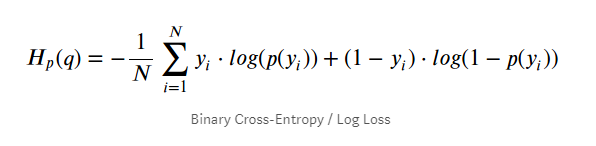

In [15]:
from numpy import log
log(4)

1.3862943611198906

#### A simple example

In [16]:
from sklearn.metrics import log_loss
log_loss([1,0,0,1], [[.1, .9], [.9, .1], [.8, .2], [.35, .65]])

0.21616187468057912

In [17]:
-1/4*(1*log(0.9)+(1-0)*log(0.9)+(1-0)*log(0.8) + 1*log(0.65))

0.21616187468057912

#### Log loss for Logistic Regression

In [18]:
ad_data = pd.read_csv('advertising.csv')
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [19]:
ad_data.drop(['Ad Topic Line', 'City', 'Country', 'Timestamp'], axis=1, inplace=True) #only keep the numeric columns
X = ad_data.drop(['Clicked on Ad'], axis = 1)
y = ad_data['Clicked on Ad']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [20]:
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [21]:
predictions = logmodel.predict(X_test)
predictions

array([1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0], d

In [22]:
probs_y=logmodel.predict_proba(X_test) 
probs_y

array([[0.00379434, 0.99620566],
       [0.92954966, 0.07045034],
       [0.88290786, 0.11709214],
       [0.00726239, 0.99273761],
       [0.94450816, 0.05549184],
       [0.00916011, 0.99083989],
       [0.01772843, 0.98227157],
       [0.43951672, 0.56048328],
       [0.00680095, 0.99319905],
       [0.01119288, 0.98880712],
       [0.95262901, 0.04737099],
       [0.25412121, 0.74587879],
       [0.89624169, 0.10375831],
       [0.01733616, 0.98266384],
       [0.00454117, 0.99545883],
       [0.01914133, 0.98085867],
       [0.93386358, 0.06613642],
       [0.97360609, 0.02639391],
       [0.00416247, 0.99583753],
       [0.96456212, 0.03543788],
       [0.01760511, 0.98239489],
       [0.8763871 , 0.1236129 ],
       [0.05814321, 0.94185679],
       [0.79071459, 0.20928541],
       [0.85219776, 0.14780224],
       [0.65573981, 0.34426019],
       [0.83950117, 0.16049883],
       [0.33314122, 0.66685878],
       [0.15831076, 0.84168924],
       [0.62360027, 0.37639973],
       [0.

In [23]:
y_test

545    1
298    0
109    0
837    1
194    0
      ..
847    0
682    1
884    0
325    1
482    0
Name: Clicked on Ad, Length: 300, dtype: int64

In [24]:
loss = log_loss(y_test, probs_y)
print("Logloss: %.2f" % (loss))

Logloss: 0.21


### [Area under Curve (AUC)](#Model-Evaluation-Metrics)

* A receiver operating characteristic (ROC) curve displays how well a model can classify binary outcomes
* Area under ROC Curve is calculated and used as a metric showing how well a model can classify data points.

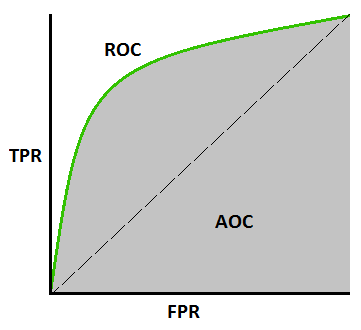

#### How to construct a ROC

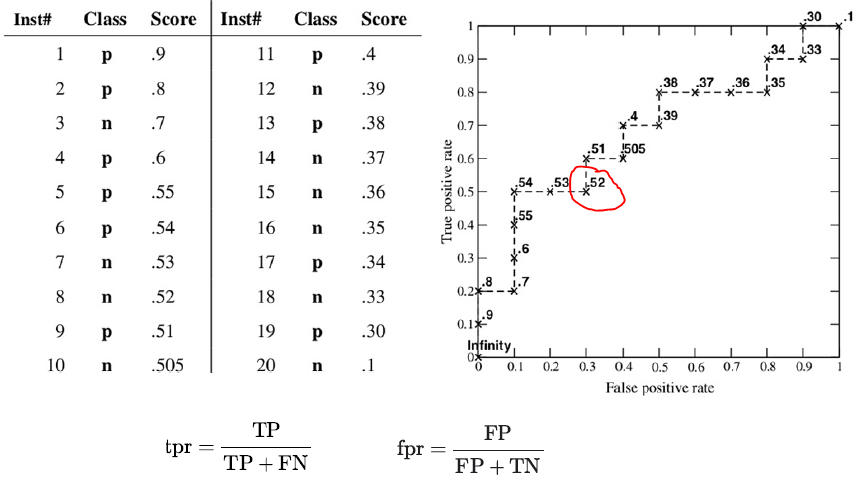

#### Let's check the point at 0.52 on the curve, it has tpr 0.5 and fpr 0.3. How do we get them?

* Assume we use logistic model and the scores are the predicted probability of positive for each sample.
* We now use 0.52 as threshold so that score >=0.52 will be positive from model. So, from the model, we predict 1-8 be positive, 9-20 negative.
* Among 1-8 predicted positives, only 1,2,4,5,6 are true positive, so TP=5
* Among 9-20 predicted negatives, false negatives are 9, 11, 13, 17, 19, so FN=5
* so tpr=5/(5+5)=0.5
* Among 1-8 predicted positives, 3,7,8 are false positive, so FP=3
* Among 9-20 predicted negatives, 10, 12, 14, 15, 16, 18, 20 are true negative, so TN=7
* so fpr=3/(3+7)=0.3
* so we get (0.3, 0.5) at the threshold 0.52

#### A more interactive way to create ROC

<img src="https://tinyurl.com/y2seolzt" width="750" align="center">

* An ROC curve is generated by plotting the false positive rate of a model against its true positive rate, for each possible cutoff value
<img src="https://tinyurl.com/y2zb593o" width="750" align="center">

* When the two distributions completely overlap, the model cannot tell one outcome from the other, so it is essentially a random classifier.
* When the two distributions separate, the ROC curve approaches the left-top corner, and the AUC value of the curve increases. 
* When the model can perfectly separate the two outcomes, the ROC curve forms a right angle and the AUC becomes 1.

<img src="https://tinyurl.com/y4bhascm" width="750" align="center">

#### Precision-Recall

* Precision (also called positive predictive value) is defined as the number of true positives divided by the total number of positive predictions
    - How correct your model’s positive predictions were.
    - How correct your doctor disgnosed a disease.
* Recall (also called sensitivity) is defined as the number of true positives divided by the total number of true postives and false negatives (i.e. all actual positives).
    - How sensitive your model was in identifying positives.
    - If a patient had disease, how sensitive the doctor was in identifying the disease.
* Similarly to the ROC curve, when the two outcomes separate, precision-recall curves will approach the top-right corner. 
* Typically, a model that produces a precision-recall curve that is closer to the top-right corner is better than a model that produces a precision-recall curve that is skewed towards the bottom of the plot.

<img src="https://tinyurl.com/y43wrt36" width="750" align="center">

#### Imbalanced Data

* Class imbalance happens when the number of outputs in one class is different from the number of outputs in another class


<img src="https://tinyurl.com/y625bvkt" width="750" align="center">

<img src="https://tinyurl.com/y32ccy55" width="750" align="center">

AUC - Test Set: 97.99%


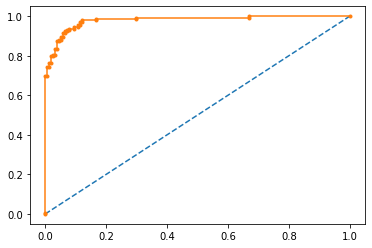

In [25]:
from sklearn.metrics import roc_auc_score, roc_curve

# keep probabilities for the positive outcome only
probs = probs_y[:, 1]

auc = roc_auc_score(y_test, probs)
print('AUC - Test Set: %.2f%%' % (auc*100))

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

### [F-Measure](#Model-Evaluation-Metrics)

* F-measure (also F-score) is a measure of a test’s accuracy that considers both the precision and the recall of the test to compute the score.

$\Large F_{1}={\frac {2}{\mathrm {recall} ^{-1}+\mathrm {precision} ^{-1}}}=2\cdot {\frac {\mathrm {precision} \cdot \mathrm {recall} }{\mathrm {precision} +\mathrm {recall} }}={\frac {\mathrm {tp} }{\mathrm {tp} +{\frac {1}{2}}(\mathrm {fp} +\mathrm {fn} )}}$

In [26]:
from sklearn.metrics import precision_recall_fscore_support as score, precision_score, recall_score, f1_score
precision = precision_score(y_test, predictions)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, predictions)
print('Recall: %f' % recall)
# f1: tp / (tp + fp + fn)
f1 = f1_score(y_test, predictions)
print('F1 score: %f' % f1)

Precision: 0.941176
Recall: 0.895105
F1 score: 0.917563


In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       157
           1       0.94      0.90      0.92       143

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



### [Regression Metrics](#Model-Evaluation-Metrics)
* Mean Absolute Error (MAE)
* Mean Squared Error (MSE)
* Root Mean Squared Error (RMSE) 

* <b>Mean Absolute Error (MAE)</b> (Mean absolute error) represents the difference between the original and predicted values extracted by averaged the absolute difference over the data set:

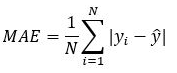


* <b>Mean Squared Error (MSE)</b> (Mean Squared Error) represents the difference between the original and predicted values extracted by squared the average difference over the data set.:

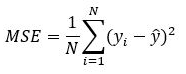

* <b>Root Mean Squared Error (RMSE)</b> is the square root of the mean of the squared errors:

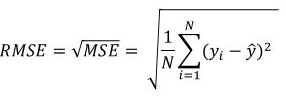

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
dataset = pd.read_csv('Weather.csv')

In [30]:
dataset.shape

(119040, 31)

In [31]:
dataset.describe()

,STA,WindGustSpd,MaxTemp,MinTemp,MeanTemp,YR,MO,DA,DR,SPD,...,FT,FB,FTI,ITH,PGT,SD3,RHX,RHN,RVG,WTE
count,119040.000000,532.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,533.000000,532.000000,...,0.0,0.0,0.0,0.0,525.000000,0.0,0.0,0.0,0.0,0.0
mean,29659.435795,37.774534,27.045111,17.789511,22.411631,43.805284,6.726016,15.797530,26.998124,20.396617,...,NaN,NaN,NaN,NaN,12.085333,NaN,NaN,NaN,NaN,NaN
std,20953.209402,10.297808,8.717817,8.334572,8.297982,1.136718,3.425561,8.794541,15.221732,5.560371,...,NaN,NaN,NaN,NaN,5.731328,NaN,NaN,NaN,NaN,NaN
min,10001.000000,18.520000,-33.333333,-38.333333,-35.555556,40.000000,1.000000,1.000000,2.000000,10.000000,...,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
25%,11801.000000,29.632000,25.555556,15.000000,20.555556,43.000000,4.000000,8.000000,11.000000,16.000000,...,NaN,NaN,NaN,NaN,8.500000,NaN,NaN,NaN,NaN,NaN
50%,22508.000000,37.040000,29.444444,21.111111,25.555556,44.000000,7.000000,16.000000,32.000000,20.000000,...,NaN,NaN,NaN,NaN,11.600000,NaN,NaN,NaN,NaN,NaN
75%,33501.000000,43.059000,31.666667,23.333333,27.222222,45.000000,10.000000,23.000000,34.000000,23.250000,...,NaN,NaN,NaN,NaN,15.000000,NaN,NaN,NaN,NaN,NaN
max,82506.000000,75.932000,50.000000,34.444444,40.000000,45.000000,12.000000,31.000000,78.000000,41.000000,...,NaN,NaN,NaN,NaN,23.900000,NaN,NaN,NaN,NaN,NaN


In [32]:
dataset.head()

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


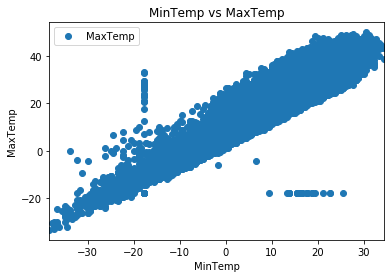

In [33]:
dataset.plot(x='MinTemp', y='MaxTemp', style='o')  
plt.title('MinTemp vs MaxTemp')  
plt.xlabel('MinTemp')  
plt.ylabel('MaxTemp')  
plt.show()

In [34]:
X = dataset['MinTemp'].values.reshape(-1,1)
y = dataset['MaxTemp'].values.reshape(-1,1)

In [35]:
dataset['MinTemp'].values#.reshape(-1,1)

array([22.22222222, 21.66666667, 22.22222222, ..., 18.33333333,
       18.33333333, 17.22222222])

In [36]:
dataset['MinTemp'].values.reshape(-1,1)

array([[22.22222222],
       [21.66666667],
       [22.22222222],
       ...,
       [18.33333333],
       [18.33333333],
       [17.22222222]])

In [37]:
dataset['MaxTemp'].values.reshape(-1,1)

array([[25.55555556],
       [28.88888889],
       [26.11111111],
       ...,
       [28.33333333],
       [28.33333333],
       [29.44444444]])

In [38]:
dataset

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119035,82506,1945-12-27,0,NaN,28.333333,18.333333,23.333333,0,NaN,45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119036,82506,1945-12-28,9.906,NaN,29.444444,18.333333,23.888889,0,1,45,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
119037,82506,1945-12-29,0,NaN,28.333333,18.333333,23.333333,0,1,45,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
119038,82506,1945-12-30,0,NaN,28.333333,18.333333,23.333333,0,NaN,45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [40]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [41]:
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

[10.66185201]
[[0.92033997]]


In [42]:
y_pred = regressor.predict(X_test)
y_pred

array([[33.67035117],
       [30.0912513 ],
       [26.51215143],
       ...,
       [32.64775121],
       [30.60255128],
       [31.62515124]])

In [43]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt
print("MAE test score:", mean_absolute_error(y_test, y_pred))
print("MSE test score:", mean_squared_error(y_test, y_pred))
print("RMSE test score:", sqrt(mean_squared_error(y_test, y_pred)))

MAE test score: 3.1993291783785303
MSE test score: 17.631568097568447
RMSE test score: 4.198996082109204


#### MAE and RMSE — Which Metric is Better?

Similarities: 

* Both MAE and RMSE express average model prediction error in units of the variable of interest. 
* Both metrics can range from 0 to ∞ and are indifferent to the direction of errors. 
* They are negatively-oriented scores, which means lower values are better.


Differences: 

* MAE has better interpretation.
* For RMSE, since the errors are squared before they are averaged, the RMSE gives a relatively high weight to large errors. 
* This means the RMSE should be more useful when large errors are particularly undesirable. 
* RMSE avoids the use of taking the absolute value, which is undesirable in many mathematical calculations
* The three tables below show examples where MAE is steady and RMSE increases as the variance associated with the frequency distribution of error magnitudes also increases.

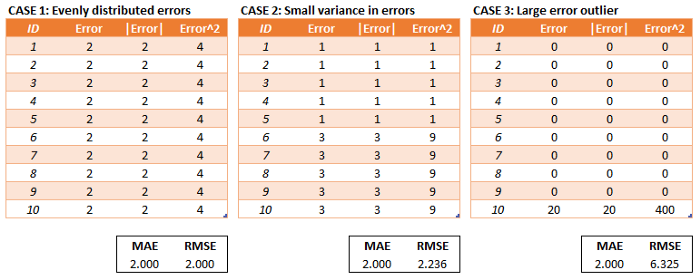

### Summary

* The estimated performance of a model tells us how well it performs on unseen data. 
* Making predictions on future data is often the main problem we want to solve. 
* Choose performance metric based on each machine learning model and different objective using a different dataset.

References

https://heartbeat.fritz.ai/introduction-to-machine-learning-model-evaluation-fa859e1b2d7f

https://towardsdatascience.com/introduction-to-machine-learning-model-interpretation-55036186eeab

https://www.kaggle.com/dansbecker/what-is-log-loss

https://paulvanderlaken.com/2019/08/16/roc-auc-precision-and-recall-visually-explained/

https://medium.com/human-in-a-machine-world/mae-and-rmse-which-metric-is-better-e60ac3bde13d

## Model Interpretation

### Introduction

* If you build and train a good model, and this model gives a certain prediction, like having a probability of buying = 90%, what was the influence of each input variable in order to get that score?
* Traditionally a lot of machine learning algorithms are treated as blackboxes. 

* Complex predictive models are not easy to interpret. But then how do you explain this model to business and how confident will the business  use this model?
* An interpretable model will always be preferred because both the end-user and your boss/co-workers can understand what your model is really doing
* Helps you debug your model by giving you a chance to see what the model really thinks is important.
* And provides good suggestions how to improve your future result.
    - Such as in presidential election. Which state should you rally to maximize your final chance with minimum effort?
    
    
#### What we really want is this: 
    
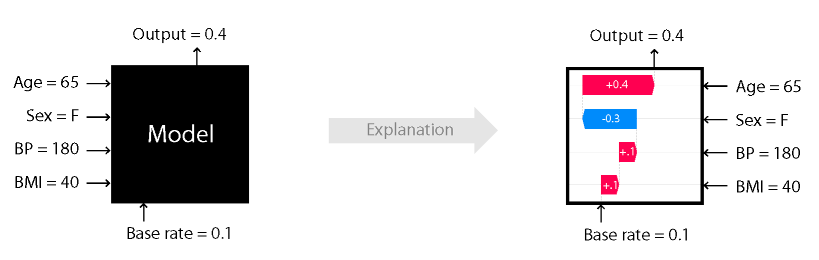

#### A simple example

* Imagine a sales prediction model. 
* A customer living in zip code "A1" with "10 purchases" arrives and its predicted probability of buying is 95%
* Another customer from zip code "A2" and "7 purchases" has the predicted probability of buying of 60%.

#### How do you explain this model?

* Each variable had its contribution to the final prediction. 
* Maybe a slight change in the number of purchases changes the prediction a lot
* Maybe changing the zip code only contributes a tiny amount on that specific customer.
* Would feature importance provide a complete answer?
* Does feature importance tell which direction the feature will impact the prediction? by how much?

#### Another example

* Assume Ann, Bob, and Cindy together were hammering a wood log, $38$ inches, to the ground.

* After work,I want to know what is everyone’s contribution (in inches)?

* Is it fair to let each person work on it independently then evaluate everyone's weight on contribution?
    - Probably not. Even you can't contribute to the work independently, but you can contribute to a team
    - For example, if you are making coffee for your team so that your team has better performance, you are making contribution.

#### To answer the question, I listed all the permutations and came up with the data in table below

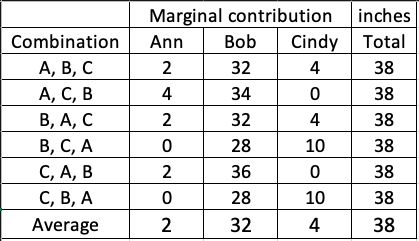

Notes:

* When the ordering is A, B, C, the marginal contributions of the three are 2, 32, and 4 inches respectively.
* The table shows the coalition of (A,B) or (B,A) is 34 inches, so the marginal contribution of C to this coalition is 4 inches.
* I took the average of all the permutations for each person to get each individual’s contribution: Ann is 2 inches, Bob is 32 inches and Cindy is 4 inches.

#### <font color='red'>Here it comes to the key idea behind Shapley value: It is the average of the marginal contributions across all permutations. </font>

#### SHAP - SHapley Additive exPlanations

* The goal of SHAP is to explain the prediction of an instance x by computing the contribution of each feature to the prediction. 
* The SHAP explanation method computes Shapley values from coalitional game theory. 
* The feature values of a data instance act as players in a coalition. 
* Shapley values tell us how to fairly distribute the "payout" (= the prediction) among the features.

#### Shapley Value in the Mathematical Form

* The Shapley value is a solution concept in cooperative game theory
* How to calculate the contribution of each player in a coalition game?

#### Assume there are $N$ players and $S$ is a subset of the $N$ players

* where $v(S)$ be the total value of the $S$ players.
* When player $i$ join the $S$ players, Player $i$’s marginal contribution is $v(S∪{i}) − v(S)$
* If we take the average of the contribution over the possible different permutations in which the coalition can be formed, we get the right contribution of player $i$:

$$\Large \varphi _{i}(v)=\sum _{S\subseteq N\setminus \{i\}}{\frac {|S|!\;(n-|S|-1)!}{n!}}(v(S\cup \{i\})-v(S))$$


#### Shapley establishes the following four Axioms in order to achieve a fair contribution:
* Efficiency. The sum of the Shapley values of all agents equals the value of the total coalition.
* Symmetry. All players have a fair chance to join the game. That’s why table above lists all the permutations of the players.
* Dummy. If player $i$ contributes nothing to any coalition $S$, then the contribution of Player i is zero, i.e. , $φᵢ(v)=0$. Obviously we need to set the boundary value.
* Additivity. For any pair of games $v, w: φ(v+w)=φ(v)+φ(w)$, where $(v+w)(S)=v(S)+w(S)$ for all $S$. This property enables us to do the simple arithmetic summation.

* Here is how we apply the Shapley value calculation to table above to get the marginal contribution:

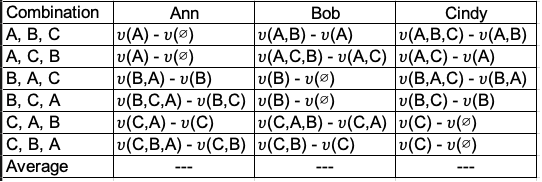

#### How is Shapley value used in machine learning?

* In real life it is hard to ask the three hammers to take turns repeatedly to record the Shapley values for the table. 
* However, it is quite natural in a machine learning setting.

#### In the following example, we use random forest algorithm to illustrate this concept

* Variables enter the machine learning model sequentially or repeatedly in the trees of the model. 
* In every step of tree growing, the algorithms evaluate each of all the variables equally to settle with the variable that contributes the most. 
* Thousands of trees are constructed. It is imaginable that various permutations of the variables will be available. Therefore the marginal contribution of each variable can be calculated.

In [44]:
import shap

In [45]:
df = pd.read_csv('winequality-red.csv')
df['quality'] = df['quality'].astype(int)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [46]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor

Y = df['quality']
X =  df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']]

In [47]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [48]:
model = RandomForestRegressor(max_depth=6, random_state=0, n_estimators=10)
model.fit(X_train, Y_train)  
print(model.feature_importances_)

[0.04205257 0.14069871 0.01922769 0.02304    0.03260547 0.02718888
 0.07128291 0.03197383 0.04071288 0.17402128 0.39719578]


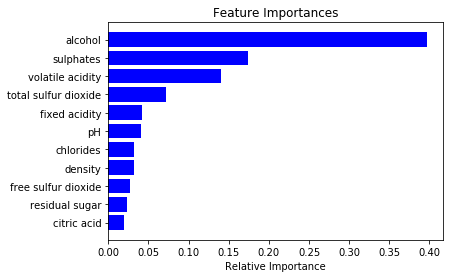

In [49]:
importances = model.feature_importances_
indices = np.argsort(importances)

features = X_train.columns
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [50]:
shap_values = shap.TreeExplainer(model).shap_values(X_train)

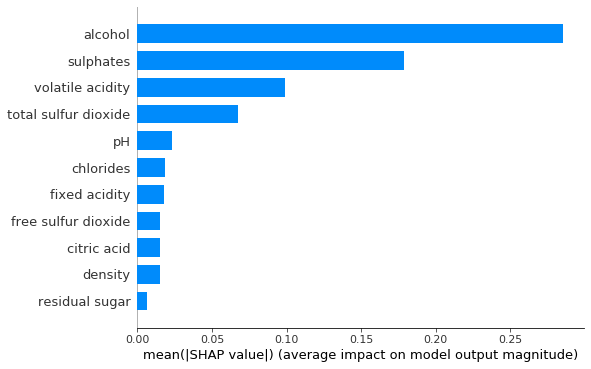

In [51]:
shap.summary_plot(shap_values, X_train, plot_type="bar")

#### Can the above variable importance plot show the directions between the features and the target variable? 

* Yes, that's the power of the Shap value plot as shown below. 
* Each dot has three characteristics. 
* The graph below plots the SHAP values of every feature for every sample. 
* It shorts features by the total of absolute SHAP values over all samples. 
* The color represents the feature value (red high, blue low).


* The vertical location shows the feature importance.
* The horizontal location shows whether the effect of that value caused a higher or lower prediction.
* Color shows whether that feature was high or low for that observation

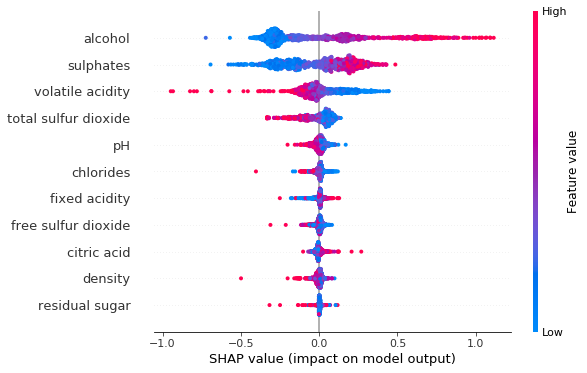

In [52]:
shap.summary_plot(shap_values, X_train)

### Some thoughts

#### How Shap works in theory?

* Shapley values calculate the importance of a feature by comparing what a model predicts with and without the feature. 
* However, since the order in which a model sees features can affect its predictions, this is done in every possible order, so that the features are fairly compared, in theory.
* Unfortunately, going through all possible combinations of features quickly becomes computationally unfeasible

#### How does the "shap" package effeciently compute Shapley values?

* "shap" package introduces optimizations which allow Shapley values to be used in practice. 
* By developing model specific algorithms, which take advantage of different model’s structures. 
    - For instance, SHAP’s integration with gradient boosted decision trees takes advantage of the hierarchy in a decision tree’s features to calculate the SHAP values.
* This allows the "shap" package to calculate Shapley values significantly faster than if a model prediction had to be calculated for every possible combination of features.

### Summary

* SHAP (SHapley Additive exPlanations) is a game theoretic approach to explain the output of any machine learning model.
* Shapley values, and the "shap" package, are powerful tools to uncovering the patterns a machine learning algorithm has identified.

References:

https://towardsdatascience.com/explain-your-model-with-the-shap-values-bc36aac4de3d

https://medium.com/fiddlerlabs/case-study-explaining-credit-modeling-predictions-with-shap-2a7b3f86ec12

https://www.viralml.com/video-content.html?v=ZkIxZ5xlMuI

http://papers.nips.cc/paper/7062-a-unified-approach-to-interpreting-model-predictions



## Homework3: Improve/evaluate/interpret your midterm project

This is not a group project. This is an individual's two weeks homework

### Your tasks


1. Data cleaning and preparation. Be careful with those missing data and outliers.
2. Use the feature engineering techniques to create 10 new features and give your rationals. It can be common sense, or statistics or by any techniques in last class.
3. Use your new features to predict the home price. You will use RandomForestRegressor as shown in the class.
4. Try different new features to improve the model performance. Choose the appropriate performance matrics. Show your improvement.
5. Use Shapley summary plot to explain your model.
6. Submit all in a Jupyter file and HTML format on canvas